In [1]:
### Imports
import pandas as pd
#Worldmap with geopandas
import matplotlib.pyplot as plt
import geopandas as gpd
import os
from matplotlib.lines import Line2D
import matplotlib

In [2]:
#helper for data import
dir_path = ''
import pandas as pd

pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', 10)

print(dir_path)

def csv_import(name, delimiter="|"):
    x = pd.read_csv(name, encoding='utf8', low_memory=False, delimiter=delimiter,
                    dtype={'text': str,
                           "USD_Disbursement": float
                           }
                    )
    return x

C:/Users/malte/Documents/GitHub/Climate_Finance_Bert/


In [3]:
# import dataset of all projects classified by climatefinancebert
df = csv_import(dir_path+'Data/climate_finance_total.csv')


In [5]:
# import data aggregated over years from postprocessing
df2= pd.read_csv(dir_path+'/Data/Analysis/timeline.csv', low_memory=False,encoding='utf8',)
df2 = df2.rename(columns={'USD_Disbursement':'effective_funding',
                                        'Year':'effective_year'})

years= list(range(2000,2020))

# filter for rio marker annotations
rio_adapt1=df[df.ClimateAdaptation==1]
rio_adapt1=rio_adapt1[['USD_Disbursement','Year']].groupby('Year').sum().reset_index()
rio_adapt2=df[df.ClimateAdaptation==2]
rio_adapt2=rio_adapt2[['USD_Disbursement','Year']].groupby('Year').sum().reset_index()
rio_miti1=df[df.ClimateMitigation==1]
rio_miti1=rio_miti1[['USD_Disbursement','Year']].groupby('Year').sum().reset_index()
rio_miti2=df[df.ClimateMitigation==2]
rio_miti2=rio_miti2[['USD_Disbursement','Year']].groupby('Year').sum().reset_index()


In [7]:
# add "0" for missing years in Rio Markers
# divide values by 1000
rio_adapt1=[0,0,0,0,0,0,0,0]+list(rio_adapt1['USD_Disbursement']/1000)
print(len(rio_adapt1))
rio_adapt2=[0,0,0,0,0,0,0]+list(rio_adapt2['USD_Disbursement']/1000)
print(len(rio_adapt2))

# divide disbursements by 1000
rio_miti1=list(rio_miti1['USD_Disbursement']/1000)
print(len(rio_miti1))
rio_miti2=list(rio_miti2['USD_Disbursement']/1000)
print(len(rio_miti2))

cluster_adap=(df2['adaptation_funding']/1000).to_list()
print(len(cluster_adap))
cluster_miti=(df2['mitigation_funding']/1000).to_list()
print(len(cluster_miti))


20
20
20
20
20
20


In [8]:
# years to plot
x = list(range(2000,2020))
print(x)

[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]


In [9]:
# stackplot function with Rio Markers
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import seaborn as sns
from matplotlib.pyplot import savefig
from matplotlib.patches import Patch

plt.rcParams['font.family'] = "Arial"
plt.rcParams['figure.figsize'] = (6, 3.6)


def rio_stacked_area(cluster, rio_principal,rio_significant,output_folder, rio_colors, cluster_color,climate_type,max_y):
    x = list(range(2000,2020))

    #plot the figure
    fig, ax = plt.subplots()
    ax.stackplot(x, [rio_principal,rio_significant],colors= rio_colors, alpha=0.5)
    plt.plot(years,cluster,color=cluster_color,linewidth=6)
    plt.vlines(x=2010,ymin=0,ymax=max_y-3,linestyle='--', color='#636363')
    plt.vlines(x=2015,ymin=0,ymax=max_y-3,linestyle='--', color='#636363')
    plt.text(x=2010,y=max_y-2,s='USD 100bn target', ha='center')
    plt.plot(2010,max_y-3,'ro', color='#636363')
    plt.text(x=2015,y=max_y-2,s='Paris Agreement', ha='center')

    plt.plot(2015,max_y-3,'ro', color='#636363')


    ax.tick_params(labelsize=12)
    #ax.set_xlabel('Year', labelpad=15, color='#333333',fontsize=12)
    ax.set_ylabel('Aggregated aid disbursements (billion USD) \n for Climate Change '+climate_type, labelpad=15, color='#333333',fontsize=12)
   # plt.setp(plt.xticks()[1], rotation=45)
    plt.xticks(np.arange(min(x), max(x)+1, 1.0), ['2000','','2002','','2004','','2006','','2008',
                                                        '','2010','','2012','','2014','','2016','','2018',''])
                #default ticks np.arange(min(x), max(x)+1, 2.0)
    plt.xlim(2000,2019)
    plt.ylim(0,max_y)

    reversed_colors=list(reversed(list(rio_colors)))
    legend_list = []
    legend_list.append(Patch(facecolor=cluster_color,
                 label='ClimateFinanceBERT'))
    legend_list.append(Patch(facecolor=reversed_colors[0],
                 label='Rio markers significant'))
    legend_list.append(Patch(facecolor=reversed_colors[1],
                 label='Rio markers principal'))


    ax.legend(handles=legend_list,loc="upper left", borderaxespad=0, prop={'size': 9},frameon=True)
    #save the figure
    savefig(output_folder, bbox_inches = "tight", dpi=1200)

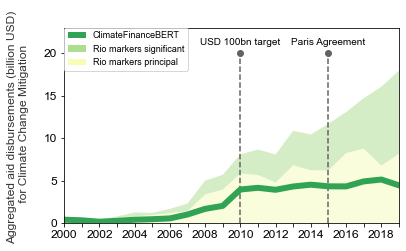

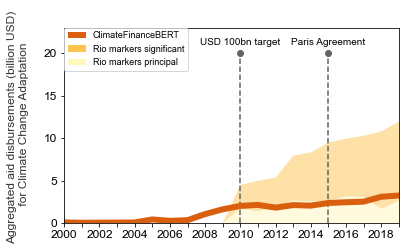

In [12]:
# colors adapt #fff7bc
#fec44f
#d95f0e
output_folder_miti=dir_path+'Figures/Fig1/Rio_lines_mitigation.png'
output_folder_adap=dir_path+'Figures/Fig1/Rio_lines_adaptation.png'
#colors miti: #f7fcb9 #addd8e #31a354
rio_stacked_area(cluster=cluster_miti, rio_principal=rio_miti2,rio_significant=rio_miti1,output_folder=output_folder_miti,
                 rio_colors =['#f7fcb9','#addd8e'], cluster_color='#31a354',climate_type='Mitigation',max_y=23)

rio_stacked_area(cluster=cluster_adap, rio_principal=rio_adapt2,rio_significant=rio_adapt1,output_folder=output_folder_adap,
                 rio_colors =['#fff7bc','#fec44f'], cluster_color='#d95f0e',climate_type='Adaptation',max_y=23)


In [6]:
#Stackplotfunction Climatefinancebert only
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import seaborn as sns
from matplotlib.pyplot import savefig
from matplotlib.patches import Patch

plt.rcParams['font.family'] = "Arial"
plt.rcParams['figure.figsize'] = (10, 6)
#colors=['lightgray','darkslategrey','powderblue','darkmagenta','lightgreen','sienna','cornflowerblue','tomato',
   #     'slateblue','gold','mediumaquamarine']


def stacked_area(df,output_folder, input_colors, max_number):

    legend_titles=[]
    #define Y all groups
    y=df.drop('effective_year',axis=1)
    legend = y.columns

    legend=list(reversed(list(legend)))
    #change colors
    pal = sns.hls_palette(11, l=.3, s=.9)
    y=y.T
    #print(y.head())
    x=list(df['effective_year'])

    #plot the figure
    fig, ax = plt.subplots()
    ax.stackplot(x, y/1000,colors= input_colors)
    ax.tick_params(labelsize=12)
    #ax.set_xlabel('Year', labelpad=15, color='#333333',fontsize=12)
    ax.set_ylabel('Aggregated disbursements (billion USD)', labelpad=15, color='#333333',fontsize=12)
   # plt.setp(plt.xticks()[1], rotation=45)
    plt.xticks(np.arange(min(x), max(x)+1, 1.0), ['2000','','2002','','2004','','2006','','2008',
                                                        '','2010','','2012','','2014','','2016','','2018',''])
                #default ticks np.arange(min(x), max(x)+1, 2.0)
    plt.xlim(2000,2019)

    #add hatch pattern to "others"
   # hatches=['//','','','','','','','','',"", ""]
   # for stacks, hatch in zip(stacks, hatches):
    #    stacks.set_hatch(hatch)

    legend_list = []
    numbers=range(max_number)
    hatches=(None,None,None,None,None,None,None,None,None,None,'///')

    reversed_colors=list(reversed(list(input_colors)))
    i=0

    while i in numbers:
        legend_list.append(Patch(facecolor=reversed_colors[i],  hatch=hatches[i],
                         label=legend[i]))
        i=i+1



    ax.legend(handles=legend_list,loc="upper left", borderaxespad=0, prop={'size': 9},frameon=True)
    #save the figure
    savefig(output_folder, bbox_inches = "tight", dpi=1200)


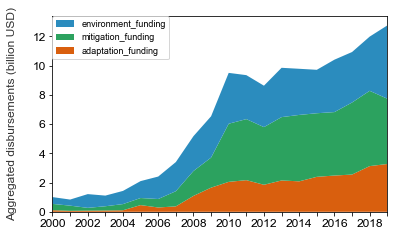

In [15]:
# Simple Plot
plt.rcParams['font.family'] = "Arial"
plt.rcParams['figure.figsize'] = (6, 3.6)

input_colors=['#d95f0e','#2ca25f','#2b8cbe']

df_stack = df2[['effective_year','adaptation_funding','mitigation_funding','environment_funding']]

output_folder=dir_path+'Figures/Fig1/stackplot.pdf'
stacked_area(df_stack, output_folder=output_folder,
             input_colors=input_colors[0:5],max_number=3)



In [16]:
# Preprocess data for detailed plot including subcategories
#Decriptives over time:
df_time = df
df_time = df_time.rename(columns={'USD_Disbursement':'effective_funding',
                                  'Year':'effective_year'})
df_time['Adaptation'] = 0
df_time['Renewables'] = 0
df_time['Energy efficiency'] = 0
df_time['Other mitigation'] = 0
df_time.Adaptation[df_time.meta_category=='Adaptation'] = df_time.effective_funding
df_time.Renewables[df_time.climate_class_number.isin([1,2,5,9,10,11,13])] = df_time.effective_funding
df_time['Energy efficiency'][df_time.climate_class_number.isin([12])] = df_time.effective_funding
df_time['Other mitigation'][df_time.climate_class_number.isin([3])] = df_time.effective_funding
df_time=df_time[['effective_year','Adaptation','Renewables','Energy efficiency','Other mitigation']].groupby('effective_year').sum().reset_index()


C:\Users\malte\Documents\GitHub\Climate_Finance_Bert\virtualenv\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\malte\Documents\GitHub\Climate_Finance_Bert\virtualenv\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\malte\Documents\GitHub\Climate_Finance_Bert\virtualenv\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: ht

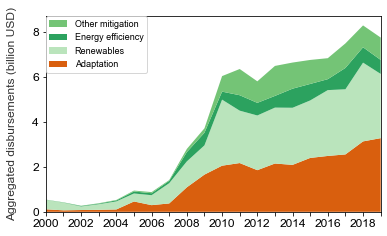

In [18]:
#Plot detailed subcategories
input_colors=['#d95f0e','#bae4bc','#2ca25f','#74c476']#,'#2b8cbe']


output_folder=dir_path+'Figures/Fig1/stackplot1.png'
stacked_area(df_time, output_folder=output_folder,
             input_colors=input_colors[0:5],max_number=4)
